<a href="https://colab.research.google.com/github/parsafrz76/Classification-of-dental-caries/blob/main/first_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt

In [ ]:
# Directory to dataset in drive
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)


Mounted at /content/gdrive


In [ ]:
import cv2
import numpy as np
import os
from keras.preprocessing.image import ImageDataGenerator
from keras import backend as K
import keras
from tensorflow.keras.models import Sequential, Model,load_model
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
from google.colab.patches import cv2_imshow
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D,MaxPool2D
from tensorflow.keras.preprocessing import image
from tensorflow.keras.initializers import glorot_uniform

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img, img_to_array

resnet_weights_path = '../input/resnet50/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5'

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models, losses, Model

In [ ]:
dataset_path = '/content/gdrive/MyDrive/PAYANNAME'
/content/gdrive/MyDrive/MODEL 2/POOSIDE

In [ ]:
import glob
POOSIDE1 = glob.glob('/content/gdrive/MyDrive/MODEL 2/POOSIDE/*.*')
SALEM1 = glob.glob('/content/gdrive/MyDrive/MODEL 2/SALEM/*.*')


In [ ]:
data = []
labels = []
for file1 in glob.glob('/content/gdrive/MyDrive/PAYANNAME/POOSIDE/*.*'):
  image = cv2.imread(file1)
  image = cv2.blur(image,(5,5))
  image=np.array(image)
  data.append(image)
  labels.append(1)
for file2 in glob.glob('/content/gdrive/MyDrive/PAYANNAME/SALEM/*.*'):
  image = cv2.imread(file2)
  image = cv2.blur(image,(5,5))
  image=np.array(image)
  data.append(image)
  labels.append(0)

In [ ]:

data = []
labels = []

for i in POOSIDE1:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (100,100))
    image=np.array(image)
    data.append(image)
    labels.append(1)
for j in SALEM1:   
    image=tf.keras.preprocessing.image.load_img(j, color_mode='rgb', 
    target_size= (100,100))
    image=np.array(image)
    data.append(image)
    labels.append(0)

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
from tensorflow.python.keras.utils.data_utils import Sequence
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [ ]:
data = np.array(data)
labels = np.array(labels)

from sklearn.model_selection import train_test_split
X_train, X_test, ytrain, ytest = train_test_split(data, labels, test_size=0.30,
                                                random_state=42)

In [ ]:
X_train=(X_train/255).astype(np.float16)

In [ ]:
X_test=(X_test/255).astype(np.float16)

In [ ]:
from sklearn.utils import class_weight
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight(class_weight = "balanced", classes= np.unique(ytrain), y= ytrain)
class_weights

array([0.74454225, 1.52231821])

**vgg16**

In [ ]:
model = Sequential()
model.add(Conv2D(input_shape=(100,100,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=2, activation="softmax"))

**FINAL VGG 16** 

In [ ]:
classes=['SOUND','DECAYED']

In [ ]:
opt1 = Adam(learning_rate=0.000009)
model.compile(optimizer=opt1,loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])  
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 100, 100, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 50, 50, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 50, 50, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 25, 25, 128)      0         
 2D)                                                    

In [ ]:
history = model.fit(X_train,ytrain, epochs=300, 
                    validation_data=(X_test,ytest))

Epoch 1/300


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


133/133 [==============================] - 15s 34ms/step - loss: 0.6413 - accuracy: 0.6699 - val_loss: 0.6412 - val_accuracy: 0.6498
Epoch 2/300
133/133 [==============================] - 3s 25ms/step - loss: 0.6259 - accuracy: 0.6716 - val_loss: 0.6464 - val_accuracy: 0.6498
Epoch 3/300
133/133 [==============================] - 3s 25ms/step - loss: 0.6124 - accuracy: 0.6782 - val_loss: 0.5938 - val_accuracy: 0.6751
Epoch 4/300
133/133 [==============================] - 3s 25ms/step - loss: 0.5761 - accuracy: 0.7151 - val_loss: 0.5765 - val_accuracy: 0.7055
Epoch 5/300
133/133 [==============================] - 3s 26ms/step - loss: 0.5640 - accuracy: 0.7170 - val_loss: 0.5579 - val_accuracy: 0.7220
Epoch 6/300
133/133 [==============================] - 3s 25ms/step - loss: 0.5482 - accuracy: 0.7354 - val_loss: 0.5522 - val_accuracy: 0.7303
Epoch 7/300
133/133 [==============================] - 3s 25ms/step - loss: 0.5244 - accuracy: 0.7470 - val_loss: 0.5334 - val_accuracy: 0.7380
Epo

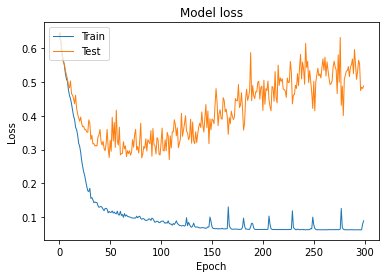

In [ ]:
plt.plot(history.history['loss'], linewidth=1, label='Train')
plt.plot(history.history['val_loss'], linewidth=1, label='Test')
plt.legend(loc='upper left')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')    
plt.show()

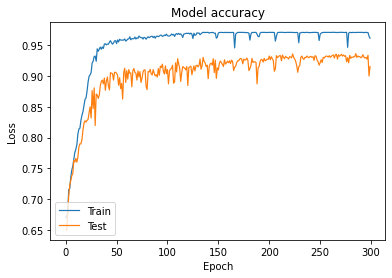

In [ ]:
plt.plot(history.history['accuracy'], linewidth=1.2, label='Train')
plt.plot(history.history['val_accuracy'], linewidth=1.2, label='Test')
plt.legend(loc='lower left')
plt.title('Model accuracy')
plt.ylabel('Loss')
plt.xlabel('Epoch')    
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
Net = model.predict(X_test)
classification=np.argmax(Net)
y_pred_2=Net.argmax(axis=-1)
cnf_matrix=confusion_matrix(ytest, y_pred_2)  
plt.show()

57/57 [==============================] - 1s 7ms/step


In [ ]:
classes=['SOUND','DECAYED']

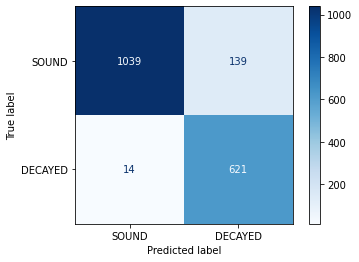

In [ ]:
cm = confusion_matrix(ytest, y_pred_2)
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)

disp.plot(cmap=plt.cm.Blues)
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest, y_pred_2))

              precision    recall  f1-score   support

           0       0.99      0.88      0.93      1178
           1       0.82      0.98      0.89       635

    accuracy                           0.92      1813
   macro avg       0.90      0.93      0.91      1813
weighted avg       0.93      0.92      0.92      1813



**VGG 19 FINAL**

In [ ]:
image_input = tf.keras.layers.Input(shape=(100,100, 3))  #Line 2
baseModel_VGG_19 = tf.keras.applications.VGG19(include_top=False,weights='imagenet',input_tensor=image_input)     #Line 3
baseModel_VGG_19.summary() 

80134624/80134624 [==============================] - 0s 0us/step
Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100, 100, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 100, 100, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 100, 100, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 50, 50, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 50, 50, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 50, 50, 128)       147584    
                                                              

In [ ]:
FC_layer_Flatten = tf.keras.layers.Flatten()(baseModel_VGG_19.output)      

In [ ]:
Dense=tf.keras.layers.Dense(units=1000,activation='relu')(FC_layer_Flatten)
Dense=tf.keras.layers.Dense(units=800,activation='relu')(Dense)#Line 7
Dense=tf.keras.layers.Dense(units=400,activation='relu')(Dense)#Line 8
Dense=tf.keras.layers.Dense(units=200,activation='relu')(Dense) #Line 9
Dense=tf.keras.layers.Dense(units=100,activation='relu')(Dense)#Line 10
Classification=tf.keras.layers.Dense(units=2,activation='sigmoid')(Dense) #Line 11

In [ ]:
model = tf.keras.Model(inputs=image_input,outputs=Classification) #Line 12
model.summary() 

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100, 100, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 100, 100, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 100, 100, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 50, 50, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 50, 50, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 50, 50, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 25, 25, 128)       0     

In [ ]:
opt1 = Adam(learning_rate=0.000009)
model.compile(optimizer=opt1,loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy']) 

In [ ]:
history = model.fit(X_train,ytrain, epochs=300, 
                    validation_data=(X_test,ytest))

Epoch 1/300


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


133/133 [==============================] - 33s 158ms/step - loss: 0.5883 - accuracy: 0.6919 - val_loss: 0.5454 - val_accuracy: 0.7490
Epoch 2/300
133/133 [==============================] - 19s 145ms/step - loss: 0.4669 - accuracy: 0.7846 - val_loss: 0.4487 - val_accuracy: 0.7750
Epoch 3/300
133/133 [==============================] - 20s 147ms/step - loss: 0.3444 - accuracy: 0.8541 - val_loss: 0.4345 - val_accuracy: 0.8202
Epoch 4/300
133/133 [==============================] - 20s 149ms/step - loss: 0.2559 - accuracy: 0.9004 - val_loss: 0.3227 - val_accuracy: 0.8649
Epoch 5/300
133/133 [==============================] - 20s 149ms/step - loss: 0.1908 - accuracy: 0.9288 - val_loss: 0.2848 - val_accuracy: 0.8958
Epoch 6/300
133/133 [==============================] - 20s 148ms/step - loss: 0.1626 - accuracy: 0.9428 - val_loss: 0.2846 - val_accuracy: 0.9024
Epoch 7/300
133/133 [==============================] - 20s 148ms/step - loss: 0.1436 - accuracy: 0.9487 - val_loss: 0.2656 - val_accurac

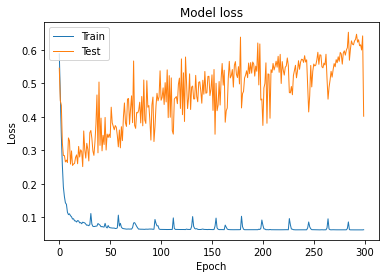

In [ ]:
plt.plot(history.history['loss'], linewidth=1, label='Train')
plt.plot(history.history['val_loss'], linewidth=1, label='Test')
plt.legend(loc='upper left')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')    
plt.show()

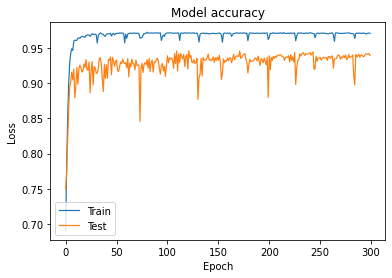

In [ ]:
plt.plot(history.history['accuracy'], linewidth=1.2, label='Train')
plt.plot(history.history['val_accuracy'], linewidth=1.2, label='Test')
plt.legend(loc='lower left')
plt.title('Model accuracy')
plt.ylabel('Loss')
plt.xlabel('Epoch')    
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
Net = model.predict(X_test)
classification=np.argmax(Net)
y_pred_2=Net.argmax(axis=-1)
cnf_matrix=confusion_matrix(ytest, y_pred_2)  
plt.show()

57/57 [==============================] - 3s 42ms/step


In [ ]:
classes=['SOUND','DECAYED']
cm = confusion_matrix(ytest, y_pred_2)

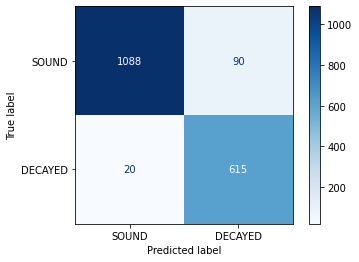

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)

disp.plot(cmap=plt.cm.Blues)
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest, y_pred_2))

              precision    recall  f1-score   support

           0       0.98      0.92      0.95      1178
           1       0.87      0.97      0.92       635

    accuracy                           0.94      1813
   macro avg       0.93      0.95      0.93      1813
weighted avg       0.94      0.94      0.94      1813



**ALEX NET FINAL**

In [ ]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(100,100,3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(5000, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(2, activation='sigmoid')
])

In [ ]:
opt1 = Adam(learning_rate=0.000009)
model.compile(optimizer=opt1,loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])  
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 23, 23, 96)        34944     
                                                                 
 batch_normalization_10 (Bat  (None, 23, 23, 96)       384       
 chNormalization)                                                
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 11, 11, 96)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 11, 11, 256)       614656    
                                                                 
 batch_normalization_11 (Bat  (None, 11, 11, 256)      1024      
 chNormalization)                                                
                                                      

In [ ]:
history = model.fit(X_train,ytrain, epochs=300, 
                    validation_data=(X_test,ytest))

Epoch 1/300


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


133/133 [==============================] - 3s 13ms/step - loss: 0.9678 - accuracy: 0.5843 - val_loss: 0.6507 - val_accuracy: 0.6498
Epoch 2/300
133/133 [==============================] - 1s 9ms/step - loss: 0.8227 - accuracy: 0.6337 - val_loss: 0.6433 - val_accuracy: 0.6498
Epoch 3/300
133/133 [==============================] - 1s 10ms/step - loss: 0.7530 - accuracy: 0.6505 - val_loss: 0.6983 - val_accuracy: 0.6498
Epoch 4/300
133/133 [==============================] - 1s 10ms/step - loss: 0.7111 - accuracy: 0.6692 - val_loss: 0.6558 - val_accuracy: 0.6696
Epoch 5/300
133/133 [==============================] - 1s 10ms/step - loss: 0.6608 - accuracy: 0.6945 - val_loss: 0.5715 - val_accuracy: 0.6955
Epoch 6/300
133/133 [==============================] - 1s 10ms/step - loss: 0.5737 - accuracy: 0.7278 - val_loss: 0.4904 - val_accuracy: 0.7430
Epoch 7/300
133/133 [==============================] - 1s 9ms/step - loss: 0.5210 - accuracy: 0.7614 - val_loss: 0.4586 - val_accuracy: 0.7832
Epoch 

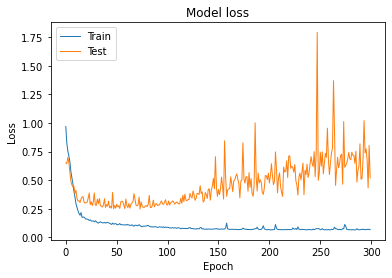

In [ ]:
plt.plot(history.history['loss'], linewidth=1, label='Train')
plt.plot(history.history['val_loss'], linewidth=1, label='Test')
plt.legend(loc='upper left')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')    
plt.show()

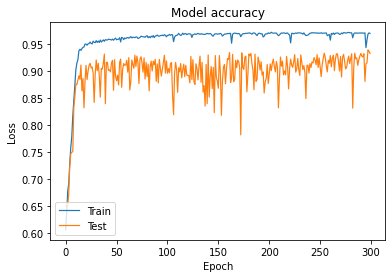

In [ ]:
plt.plot(history.history['accuracy'], linewidth=1.2, label='Train')
plt.plot(history.history['val_accuracy'], linewidth=1.2, label='Test')
plt.legend(loc='lower left')
plt.title('Model accuracy')
plt.ylabel('Loss')
plt.xlabel('Epoch')    
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
Net = model.predict(X_test)
classification=np.argmax(Net)
y_pred_2=Net.argmax(axis=-1)
cnf_matrix=confusion_matrix(ytest, y_pred_2)  
plt.show()

57/57 [==============================] - 0s 3ms/step


In [ ]:
classes=['SOUND','DECAYED']
cm = confusion_matrix(ytest, y_pred_2)

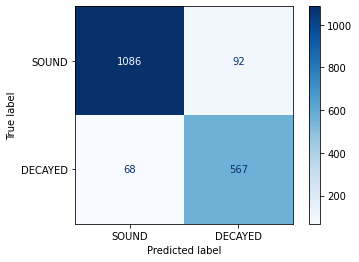

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)

disp.plot(cmap=plt.cm.Blues)
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest, y_pred_2))


              precision    recall  f1-score   support

           0       0.94      0.92      0.93      1178
           1       0.86      0.89      0.88       635

    accuracy                           0.91      1813
   macro avg       0.90      0.91      0.90      1813
weighted avg       0.91      0.91      0.91      1813



**RESNET 50 FINAL**

In [ ]:
def identity_block(X, f, filters, stage, block):
    
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'
    
    F1, F2, F3 = filters
    
    X_shortcut = X
        
    X = Conv2D(filters = F1, kernel_size = (1, 1), strides = (1,1), padding = 'valid', name = conv_name_base + '2a', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2a')(X)
    X = Activation('relu')(X)
        
    X = Conv2D(filters = F2, kernel_size = (f, f), strides = (1,1), padding = 'same', name = conv_name_base + '2b', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2b')(X)
    X = Activation('relu')(X)

    X = Conv2D(filters = F3, kernel_size = (1, 1), strides = (1,1), padding = 'valid', name = conv_name_base + '2c', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2c')(X)

    # Add shortcut value to main path
    X = Add()([X_shortcut, X])
    X = Activation('relu')(X)
        
    return X

In [ ]:
def convolutional_block(X, f, filters, stage, block, s = 2):
        
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'
    F1, F2, F3 = filters
    X_shortcut = X
    X = Conv2D(F1, (1, 1), strides = (s,s), name = conv_name_base + '2a', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2a')(X)
    X = Activation('relu')(X)
    X = Conv2D(filters = F2, kernel_size = (f, f), strides = (1,1), padding = 'same', name = conv_name_base + '2b', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2b')(X)
    X = Activation('relu')(X)
    X = Conv2D(filters = F3, kernel_size = (1, 1), strides = (1,1), padding = 'valid', name = conv_name_base + '2c', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2c')(X)
    X_shortcut = Conv2D(filters = F3, kernel_size = (1, 1), strides = (s,s), padding = 'valid', name = conv_name_base + '1', kernel_initializer = glorot_uniform(seed=0))(X_shortcut)
    X_shortcut = BatchNormalization(axis = 3, name = bn_name_base + '1')(X_shortcut)
    X = Add()([X_shortcut, X])
    X = Activation('relu')(X)
   
    return X

In [ ]:
def ResNet50(input_shape = (100, 100, 3)):
    X_input = Input(input_shape)
    X = ZeroPadding2D((3, 3))(X_input)
    X = Conv2D(64, (7, 7), strides = (2, 2), name = 'conv1', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = 'bn_conv1')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((3, 3), strides=(2, 2))(X)
    X = convolutional_block(X, f = 3, filters = [64, 64, 256], stage = 2, block='a', s = 1)
    X = identity_block(X, 3, [64, 64, 256], stage=2, block='b')
    X = identity_block(X, 3, [64, 64, 256], stage=2, block='c')
    X = convolutional_block(X, f = 3, filters = [128, 128, 512], stage = 3, block='a', s = 2)
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='b')
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='c')
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='d')
    X = convolutional_block(X, f = 3, filters = [256, 256, 1024], stage = 4, block='a', s = 2)
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='b')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='c')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='d')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='e')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='f')
    X = convolutional_block(X, f = 3, filters = [512, 512, 2048], stage = 5, block='a', s = 2)
    X = identity_block(X, 3, [512, 512, 2048], stage=5, block='b')
    X = identity_block(X, 3, [512, 512, 2048], stage=5, block='c')
    X = AveragePooling2D(pool_size=(2, 2),name='avg_pool')(X)
    X = Flatten()(X)
    X = Dense(2, activation='softmax', kernel_initializer = glorot_uniform(seed=0))(X)
    model = Model(inputs = X_input, outputs = X, name='ResNet50')
    return model

In [ ]:
model = ResNet50(input_shape = (100, 100, 3))

In [ ]:
opt1 = Adam(learning_rate=0.000009)
model.compile(optimizer=opt1,loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])  
model.summary()

Model: "ResNet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d_1 (ZeroPadding2  (None, 106, 106, 3)  0          ['input_3[0][0]']                
 D)                                                                                               
                                                                                                  
 conv1 (Conv2D)                 (None, 50, 50, 64)   9472        ['zero_padding2d_1[0][0]']       
                                                                                           

In [ ]:
history = model.fit(X_train,ytrain, epochs=300, 
                    validation_data=(X_test,ytest))

Epoch 1/300


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


133/133 [==============================] - 21s 46ms/step - loss: 0.7043 - accuracy: 0.6368 - val_loss: 0.6967 - val_accuracy: 0.6498
Epoch 2/300
133/133 [==============================] - 4s 34ms/step - loss: 0.6068 - accuracy: 0.6760 - val_loss: 0.7525 - val_accuracy: 0.6498
Epoch 3/300
133/133 [==============================] - 5s 34ms/step - loss: 0.5456 - accuracy: 0.7170 - val_loss: 0.7661 - val_accuracy: 0.6492
Epoch 4/300
133/133 [==============================] - 4s 33ms/step - loss: 0.5103 - accuracy: 0.7501 - val_loss: 0.7147 - val_accuracy: 0.6398
Epoch 5/300
133/133 [==============================] - 4s 34ms/step - loss: 0.4916 - accuracy: 0.7664 - val_loss: 0.6284 - val_accuracy: 0.6558
Epoch 6/300
133/133 [==============================] - 4s 34ms/step - loss: 0.4625 - accuracy: 0.7867 - val_loss: 0.5659 - val_accuracy: 0.7181
Epoch 7/300
133/133 [==============================] - 5s 34ms/step - loss: 0.4324 - accuracy: 0.7957 - val_loss: 0.5191 - val_accuracy: 0.7529
Epo

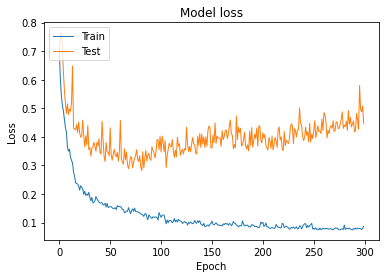

In [ ]:
plt.plot(history.history['loss'], linewidth=1, label='Train')
plt.plot(history.history['val_loss'], linewidth=1, label='Test')
plt.legend(loc='upper left')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')    
plt.show()

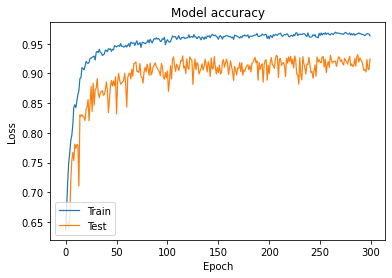

In [ ]:
plt.plot(history.history['accuracy'], linewidth=1.2, label='Train')
plt.plot(history.history['val_accuracy'], linewidth=1.2, label='Test')
plt.legend(loc='lower left')
plt.title('Model accuracy')
plt.ylabel('Loss')
plt.xlabel('Epoch')    
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
Net = model.predict(X_test)
classification=np.argmax(Net)
y_pred_2=Net.argmax(axis=-1)
cnf_matrix=confusion_matrix(ytest, y_pred_2)  
plt.show()

57/57 [==============================] - 1s 9ms/step


In [ ]:
classes=['SOUND','DECAYED']
cm = confusion_matrix(ytest, y_pred_2)

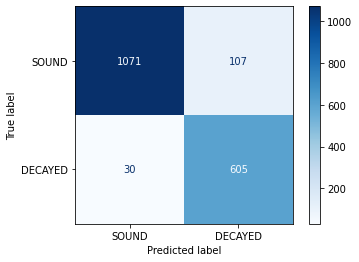

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)

disp.plot(cmap=plt.cm.Blues)
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest, y_pred_2))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94      1178
           1       0.85      0.95      0.90       635

    accuracy                           0.92      1813
   macro avg       0.91      0.93      0.92      1813
weighted avg       0.93      0.92      0.93      1813

